# Oh, Rats
Rats are synonymous with NYC and I’m looking at which areas have the most of them. I’d also like to look at the reasons why rats may prefer one area over another and see if it has any correlation with the median income of each area.

Sources 
- https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe
- http://www.infoshare.org/main/directip.aspx

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

In [2]:
pd.options.display.max_columns

100

In [3]:
df = pd.read_csv("Rat_Sightings.csv")

/Users/aw207/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [5]:
df.shape

(133828, 38)

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,36258648,05/23/2017 12:00:00 AM,06/01/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11385.0,1737 WILLOUGHBY AVENUE,WILLOUGHBY AVENUE,CYPRESS AVENUE,SENECA AVENUE,NaN,NaN,ADDRESS,Ridgewood,NaN,NaN,Closed,06/22/2017 04:22:03 PM,06/01/2017 12:00:00 AM,05 QUEENS,QUEENS,1006773.0,197332.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708279,-73.918762,"(40.70827884615599, -73.91876178147548)"
1,36258650,05/23/2017 12:00:00 AM,07/06/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,11238.0,820 WASHINGTON AVENUE,WASHINGTON AVENUE,ST JOHNS PLACE,LINCOLN PLACE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,06/22/2017 11:43:57 PM,07/06/2017 12:00:00 AM,08 BROOKLYN,BROOKLYN,994534.0,184614.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673394,-73.962926,"(40.673393560937974, -73.9629260422388)"
2,32989859,03/25/2016 12:00:00 AM,04/05/2016 12:24:24 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10473.0,319 WHITE PLAINS ROAD,WHITE PLAINS ROAD,O'BRIEN AVENUE,PATTERSON AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/24/2016 11:26:00 AM,04/05/2016 12:24:24 PM,09 BRONX,BRONX,1024132.0,235160.0,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812046,-73.855925,"(40.81204563877927, -73.85592527378644)"
3,35383418,01/31/2017 12:00:00 AM,02/06/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11213.0,1134 ST JOHN'S PLACE,ST JOHN'S PLACE,HAMPTON PLACE,ALBANY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,03/02/2017 10:41:41 AM,02/06/2017 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,1000744.0,183780.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671095,-73.940541,"(40.67109502635599, -73.94054095543362)"
4,36923956,08/11/2017 12:00:00 AM,09/15/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10308.0,29 AINSWORTH AVENUE,AINSWORTH AVENUE,AMBOY ROAD,O'GORMAN AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,09/10/2017 09:53:13 AM,09/15/2017 12:00:00 AM,03 STATEN ISLAND,STATEN ISLAND,945399.0,140951.0,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553469,-74.139807,"(40.553468530969305, -74.13980704201646)"


In [7]:
df['Year'] = df['Created Date'].str.replace('(.*/)', '', regex = True)
df['Year'] = df['Year'].str.replace('( .*)', '', regex = True)
df['Year'] = df['Year'].astype(int)

In [8]:
df.to_csv("rats_cleaned.csv", index=False)

In [9]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Year
0,36258648,05/23/2017 12:00:00 AM,06/01/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11385.0,1737 WILLOUGHBY AVENUE,WILLOUGHBY AVENUE,CYPRESS AVENUE,SENECA AVENUE,NaN,NaN,ADDRESS,Ridgewood,NaN,NaN,Closed,06/22/2017 04:22:03 PM,06/01/2017 12:00:00 AM,05 QUEENS,QUEENS,1006773.0,197332.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708279,-73.918762,"(40.70827884615599, -73.91876178147548)",2017
1,36258650,05/23/2017 12:00:00 AM,07/06/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,11238.0,820 WASHINGTON AVENUE,WASHINGTON AVENUE,ST JOHNS PLACE,LINCOLN PLACE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,06/22/2017 11:43:57 PM,07/06/2017 12:00:00 AM,08 BROOKLYN,BROOKLYN,994534.0,184614.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673394,-73.962926,"(40.673393560937974, -73.9629260422388)",2017
2,32989859,03/25/2016 12:00:00 AM,04/05/2016 12:24:24 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10473.0,319 WHITE PLAINS ROAD,WHITE PLAINS ROAD,O'BRIEN AVENUE,PATTERSON AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,04/24/2016 11:26:00 AM,04/05/2016 12:24:24 PM,09 BRONX,BRONX,1024132.0,235160.0,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812046,-73.855925,"(40.81204563877927, -73.85592527378644)",2016
3,35383418,01/31/2017 12:00:00 AM,02/06/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11213.0,1134 ST JOHN'S PLACE,ST JOHN'S PLACE,HAMPTON PLACE,ALBANY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,03/02/2017 10:41:41 AM,02/06/2017 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,1000744.0,183780.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671095,-73.940541,"(40.67109502635599, -73.94054095543362)",2017
4,36923956,08/11/2017 12:00:00 AM,09/15/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10308.0,29 AINSWORTH AVENUE,AINSWORTH AVENUE,AMBOY ROAD,O'GORMAN AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,09/10/2017 09:53:13 AM,09/15/2017 12:00:00 AM,03 STATEN ISLAND,STATEN ISLAND,945399.0,140951.0,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553469,-74.139807,"(40.553468530969305, -74.13980704201646)",2017


## Charts

In [10]:
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]
df_2014 = df[df['Year'] == 2014]
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]

In [53]:
df_2010.Descriptor.value_counts()

Rat Sighting    10534
Name: Descriptor, dtype: int64

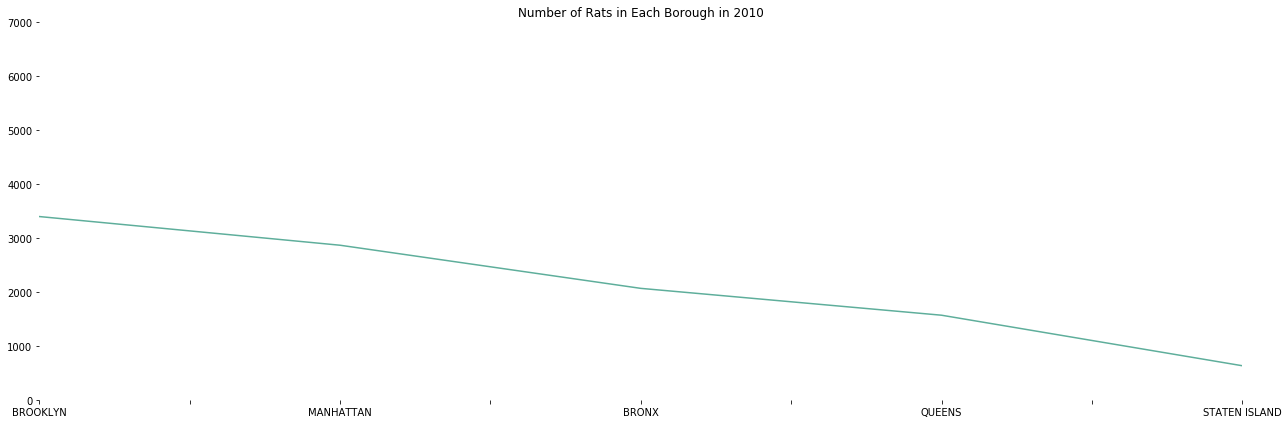

In [48]:
ax = df_2010.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2010",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2010.pdf")

In [54]:
df_2011.Descriptor.value_counts()

Rat Sighting    10454
Name: Descriptor, dtype: int64

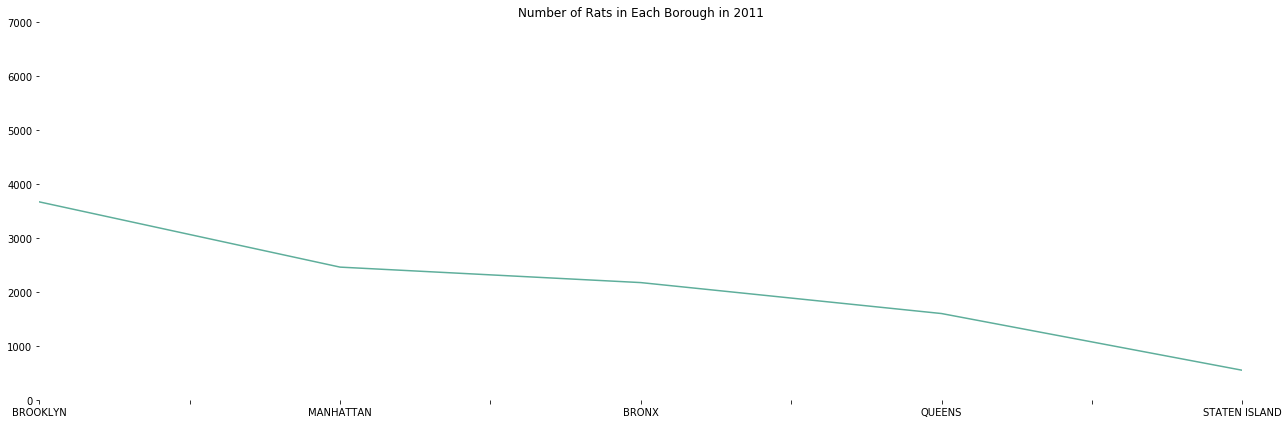

In [47]:
ax = df_2011.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2011",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)

plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2011.pdf")

In [55]:
df_2012.Descriptor.value_counts()

Rat Sighting    10642
Name: Descriptor, dtype: int64

In [49]:
df_2012 = df_2012[df_2012['Borough'] != 'Unspecified']

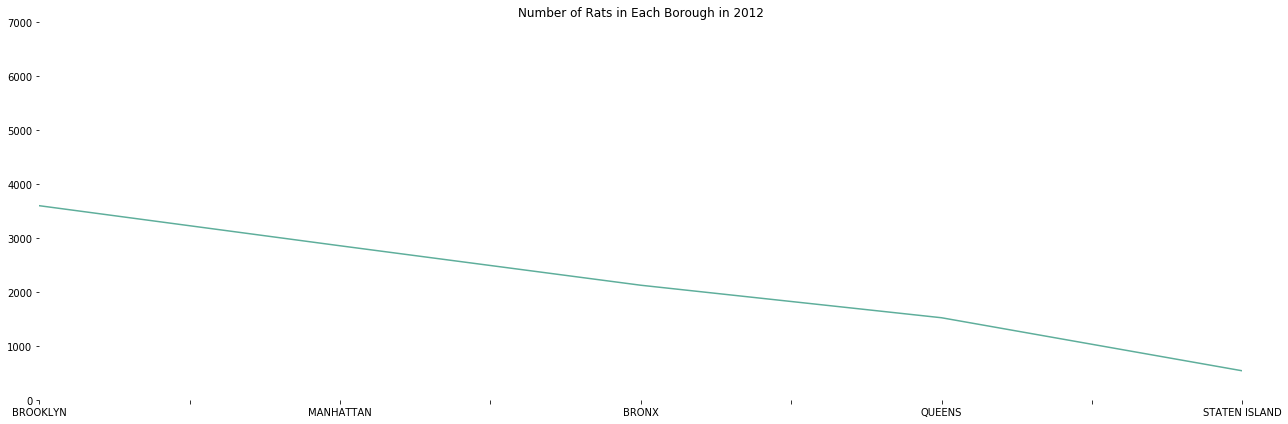

In [50]:
ax = df_2012.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2012",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2012.pdf")

In [56]:
df_2013.Descriptor.value_counts()

Rat Sighting    10739
Name: Descriptor, dtype: int64

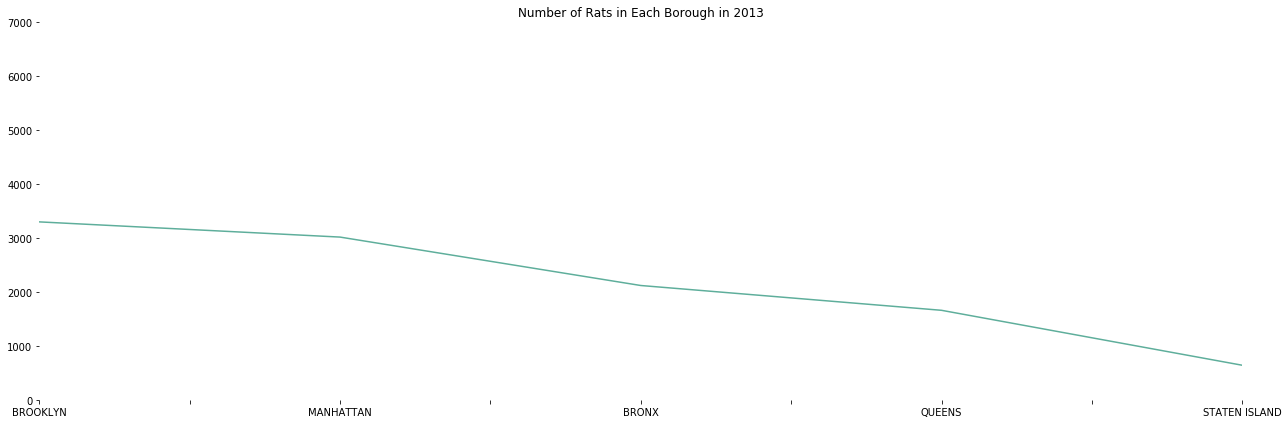

In [45]:
ax = df_2013.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2013",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2013.pdf")

In [57]:
df_2014.Descriptor.value_counts()

Rat Sighting    12617
Name: Descriptor, dtype: int64

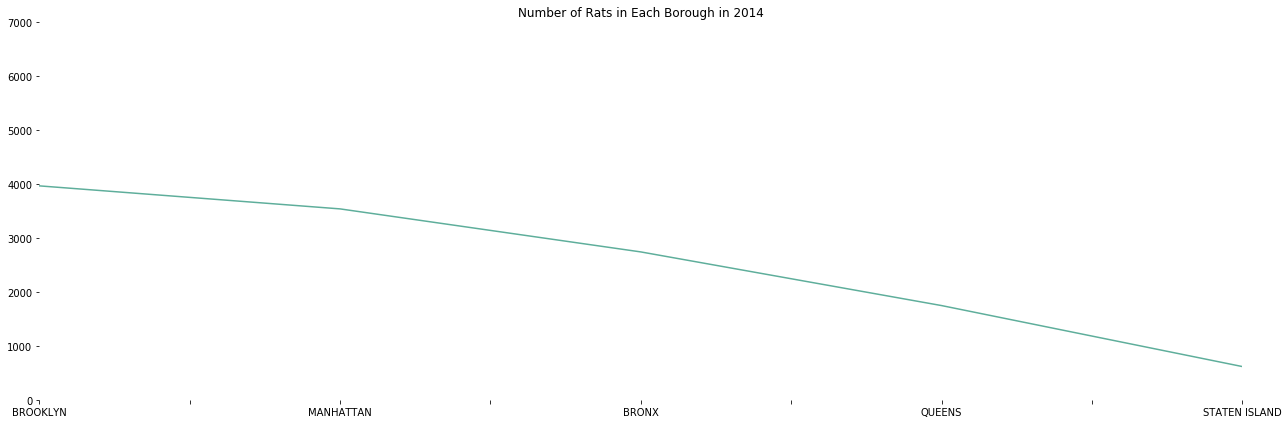

In [44]:
ax = df_2014.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2014",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2014.pdf")

In [58]:
df_2015.Descriptor.value_counts()

Rat Sighting    15286
Name: Descriptor, dtype: int64

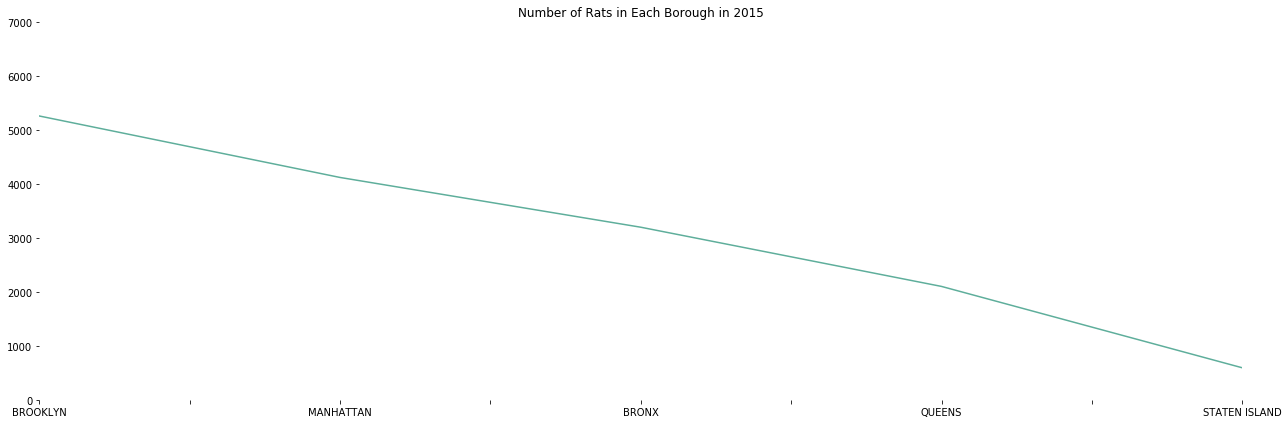

In [43]:
ax = df_2015.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2015",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2015.pdf")

In [59]:
df_2016.Descriptor.value_counts()

Rat Sighting    17230
Name: Descriptor, dtype: int64

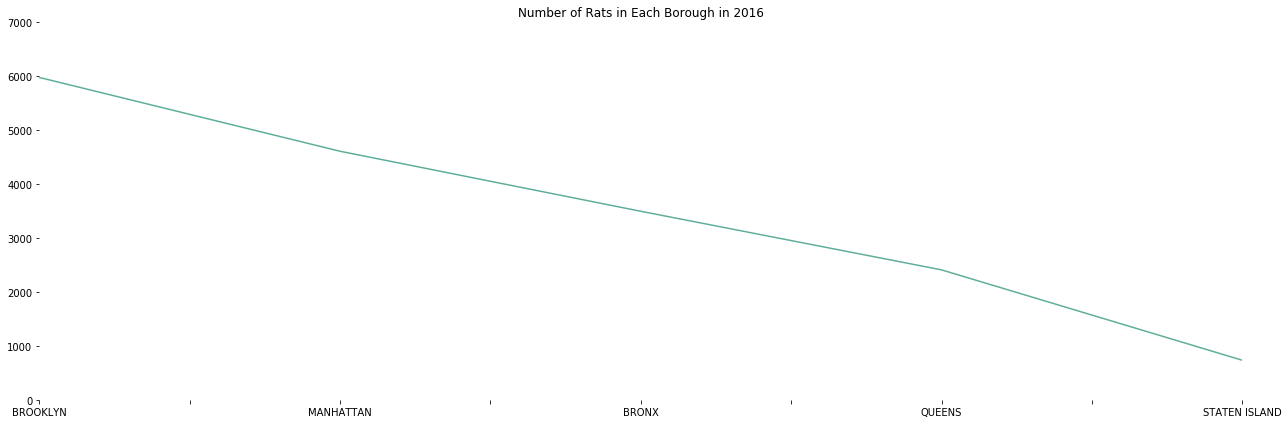

In [42]:
ax = df_2016.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2016",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2016.pdf")

In [60]:
df_2017.Descriptor.value_counts()

Rat Sighting    19152
Name: Descriptor, dtype: int64

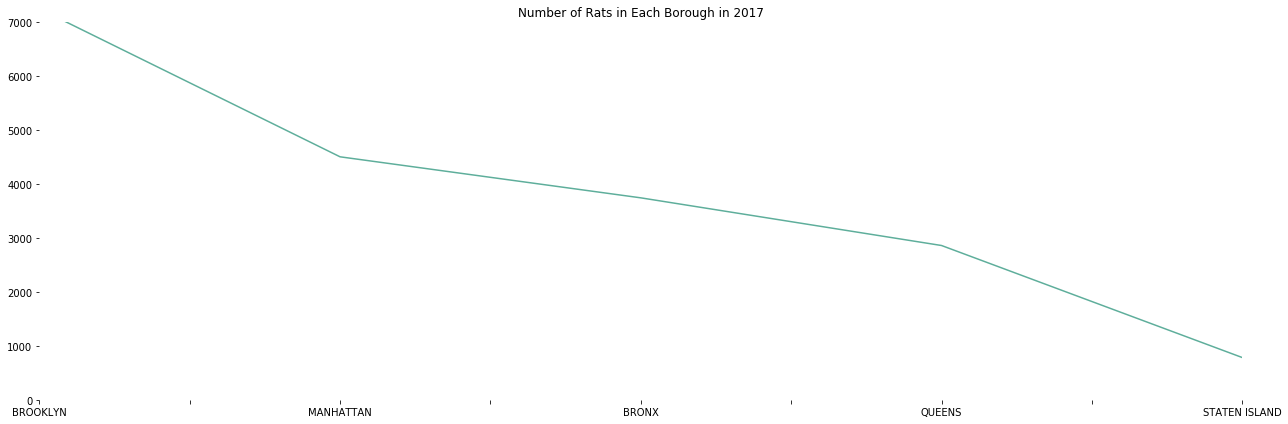

In [41]:
ax = df_2017.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2017",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2017.pdf")

In [25]:
df_2018 = df_2018[df_2018['Borough'] != 'Unspecified']

In [63]:
df_2018.Descriptor.value_counts()

Rat Sighting    17344
Name: Descriptor, dtype: int64

In [61]:
df_2018.Borough.value_counts()

BROOKLYN         6565
MANHATTAN        4295
BRONX            3134
QUEENS           2605
STATEN ISLAND     745
Name: Borough, dtype: int64

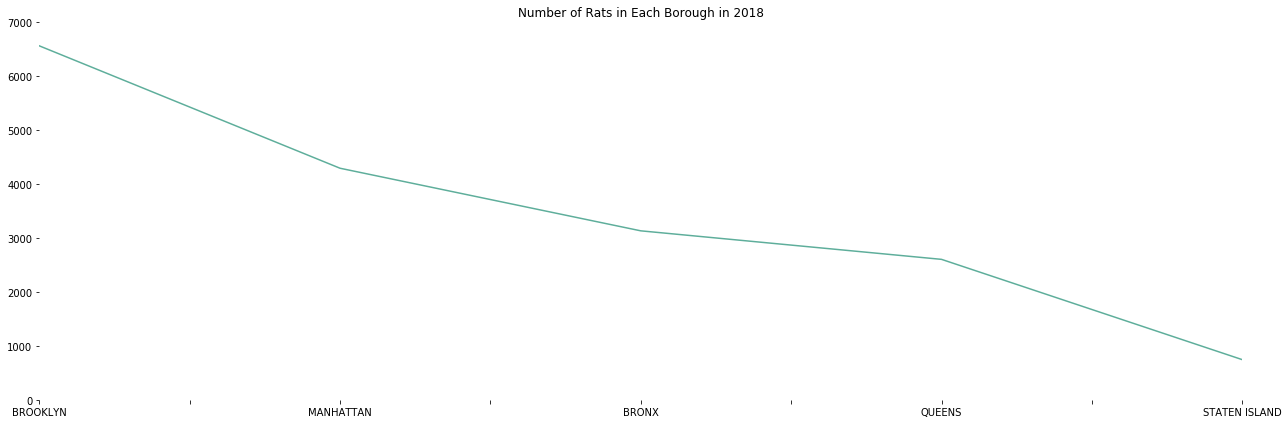

In [40]:
ax = df_2018.Borough.value_counts().plot(
           figsize=(18, 6),
           title="Number of Rats in Each Borough in 2018",
           color="#5EAE9B")
for axis in ax.spines:
    ax.spines[axis].set_visible(False)
    
plt.ylim([0, 7000])

plt.tight_layout()
plt.savefig("2018.pdf")